In [109]:
import json
from collections import Counter


path = '/Users/mondormo/Desktop/'

with open(path + 'published') as file:
    published = file.read()
    published = published.split('\n')
    
with open(path + 'disabled') as file:
    disabled = file.read()
    disabled = disabled.split('\n')
    
    
def get_keywords(lines):
    counter = Counter()
    for line in lines:
        try:
            o = json.loads(line)
            if 'Entities' in o:
                for each in o['Entities']:
                    if 'Text' in each:
                        w = each['Text']
                        counter[w] += 1
        except:
            print(line)

    return counter
            
        

In [110]:
published_keywords = get_keywords(published)
print(published_keywords.most_common(50))


[('#asia', 57), ('#japan', 54), ('#bali', 31), ('2019', 28), ('Bali', 28), ('#australia', 27), ('#indonesia', 26), ('#china', 25), ('@jetstaraustralia', 24), ('one', 23), ('2018', 19), ('#cambodia', 17), ('Cambodia', 16), ('#instagram', 16), ('Japan', 16), ('#thailand', 14), ('#tokyo', 14), ('Indonesia', 14), ('Angkor Wat', 13), ('#malaysia', 13), ('#taiwan', 13), ('#sakura', 13), ('Chinese New Year', 12), ('One', 12), ('#okinawa', 12), ('#osaka', 12), ('Bangkok', 11), ('New Year', 11), ('#sanya', 11), ('#southeastasia', 10), ('@tatiana_sakharova_ Свет', 10), ('@runrunrunrunrunrunaway', 10), ('#hainan', 10), ('Yangon', 10), ('Singapore', 10), ('BALI', 10), ('Thailand', 9), ('Manila', 9), ('Tokyo', 9), ('Osaka', 9), ('#bangkok', 8), ('#travelasia', 8), ('Siem Reap', 8), ('#Taiwan', 8), ('Myanmar', 8), ('@jetstarasia', 8), ('Penang', 7), ('this year', 7), ('Hong Kong', 7), ('Sydney', 7)]


In [111]:
disabled_keywords = get_keywords(disabled)
print(disabled_keywords.most_common(50))


[('#japan', 6551), ('#kyoto', 3758), ('2019', 2128), ('Kyoto', 1747), ('#osaka', 1195), ('#instagram', 1071), ('#asia', 1016), ('Japan', 1011), ('#Japan', 783), ('#tokyo', 707), ('#thailand', 644), ('#japanese', 638), ('#Kyoto', 546), ('dan komen', 540), ('2', 509), ('Japanese', 500), ('one', 486), ('2018', 478), ('Bangkok', 464), ('Thailand', 439), ('#2019', 431), ('100%', 402), ('1', 401), ('today', 368), ('Indonesia', 356), ('Whatsapp', 334), ('WA', 323), ('#japon', 318), ('Jakarta', 308), ('#jakarta', 303), ('#japantrip', 301), ('#kyotojapan', 298), ('Instagram', 297), ('#japantravel', 286), ('#bangkok', 281), ('Phuket', 275), ('Osaka', 271), ('Amiinn', 263), ('Tokyo', 253), ('10', 250), ('3', 246), ('japan', 246), ('WhatsApp', 239), ('Today', 238), ('#australia', 230), ('HP', 228), ('#indonesia', 227), ('#shrine', 215), ('#phuket', 208), ('#cambodia', 208)]


In [112]:
if '#kyoto' in disabled_keywords:
    print('yes')

yes


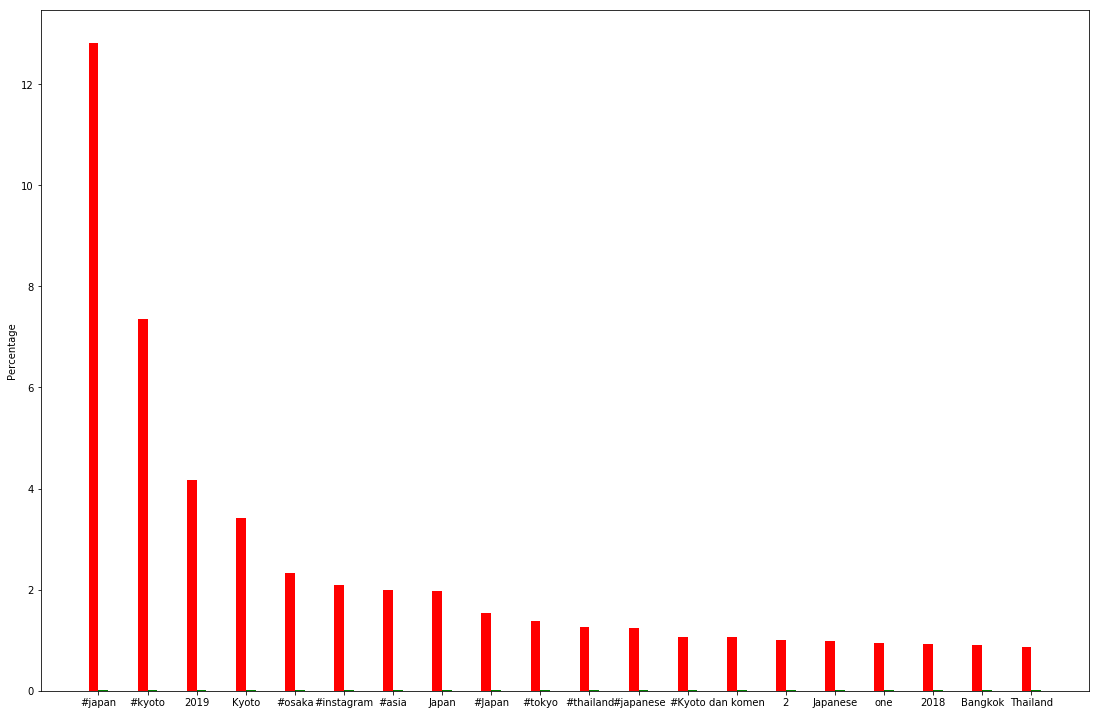

In [113]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

plt.figure(figsize=(6*3.13,4*3.13))

#def plot_graph(published, disabled, most_common=50):
most_common=20
published_counter = get_keywords(published)
disabled_counter = get_keywords(disabled)

total_count = len(published) + len(disabled)

published_percentages = []
disabled_percentages = []
labels = []

for w, c in disabled_counter.most_common(most_common):
    
    disabled_percentage = (c / total_count) * 100
    disabled_percentages.append(disabled_percentage)

    published_percentage = 0
    if w in published_counter:
        published_percentage = (published_counter.get(w) / total_count) * 100
        published_percentages.append(published_percentage)

    labels.append(w)



ind = np.arange(len(labels))
width = 0.2
plt.bar(ind - width/2, disabled_percentages, width, color='Red', label='Disabled')
plt.bar(ind + width/2, published_percentage, width, color='Green', label='Published')
            
plt.ylabel('Percentage')
plt.xticks(ind, labels)

plt.show()

        

            
        
    

In [125]:
common_words = []

common_disabled = [w for w, c in disabled_counter.most_common(50)]
for w, c in published_counter.most_common(50):
    print(w)
    if w in common_disabled:
        common_words.append(w)
        
        
    

#asia
#japan
#bali
2019
Bali
#australia
#indonesia
#china
@jetstaraustralia
one
2018
#cambodia
Cambodia
#instagram
Japan
#thailand
#tokyo
Indonesia
Angkor Wat
#malaysia
#taiwan
#sakura
Chinese New Year
One
#okinawa
#osaka
Bangkok
New Year
#sanya
#southeastasia
@tatiana_sakharova_ Свет
@runrunrunrunrunrunaway
#hainan
Yangon
Singapore
BALI
Thailand
Manila
Tokyo
Osaka
#bangkok
#travelasia
Siem Reap
#Taiwan
Myanmar
@jetstarasia
Penang
this year
Hong Kong
Sydney


In [126]:
common_words

['#asia',
 '#japan',
 '2019',
 '#australia',
 '#indonesia',
 'one',
 '2018',
 '#cambodia',
 '#instagram',
 'Japan',
 '#thailand',
 '#tokyo',
 'Indonesia',
 '#osaka',
 'Bangkok',
 'Thailand',
 'Tokyo',
 'Osaka',
 '#bangkok']